In [1]:
import os
from glob import glob

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [3]:
# Creating path to our data
images_folder_path = os.path.join("img")

In [4]:
# Generating a list of tif files
images_paths = glob(os.path.join(images_folder_path, "*LC08_L1TP_152043_20211223_20211230_01_T2_B*.TIF"))

In [5]:
# Sorting the data to ensure bands are in the correct order
images_paths.sort()
images_paths

['img\\LC08_L1TP_152043_20211223_20211230_01_T2_B1.TIF',
 'img\\LC08_L1TP_152043_20211223_20211230_01_T2_B2.TIF',
 'img\\LC08_L1TP_152043_20211223_20211230_01_T2_B3.TIF',
 'img\\LC08_L1TP_152043_20211223_20211230_01_T2_B4.TIF',
 'img\\LC08_L1TP_152043_20211223_20211230_01_T2_B5.TIF',
 'img\\LC08_L1TP_152043_20211223_20211230_01_T2_B6.TIF',
 'img\\LC08_L1TP_152043_20211223_20211230_01_T2_B7.TIF']

In [13]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an array object"""
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [15]:
# Opening all the bands using a loop and storing in a single array
all_bands = []
for i, aband in enumerate(images_paths):
    # storing dimensions of all bands in a single array
    all_bands.append(open_clean_bands(aband))
    
    # Assign a band number to the new array object
    all_bands[i]["band"]=i+1


In [17]:
# Joining all the bands together into a single array object 
images_array = xr.concat(all_bands, dim="band")

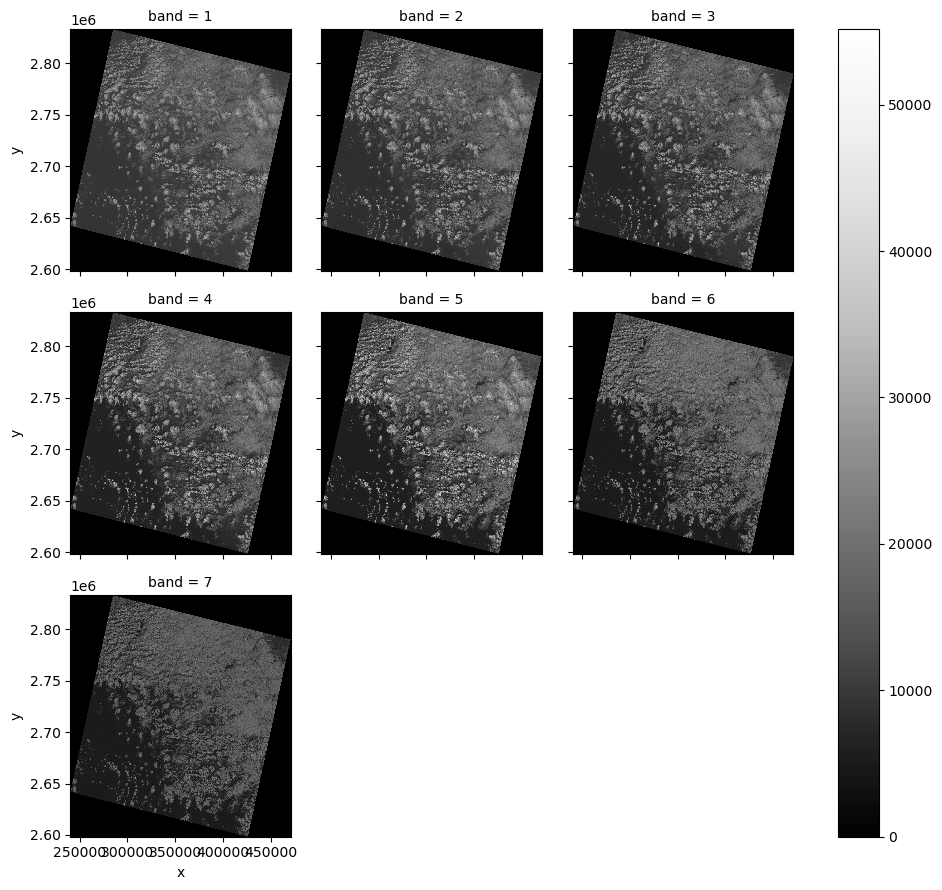

In [18]:
# plotting all the bamds
images_array.plot.imshow(col="band", col_wrap=3, cmap="Greys_r")
plt.show()

In [22]:
# in the above plot,
# band[1] = blue
# band[2] = green
# band[3] = red
# band[4] = NIR

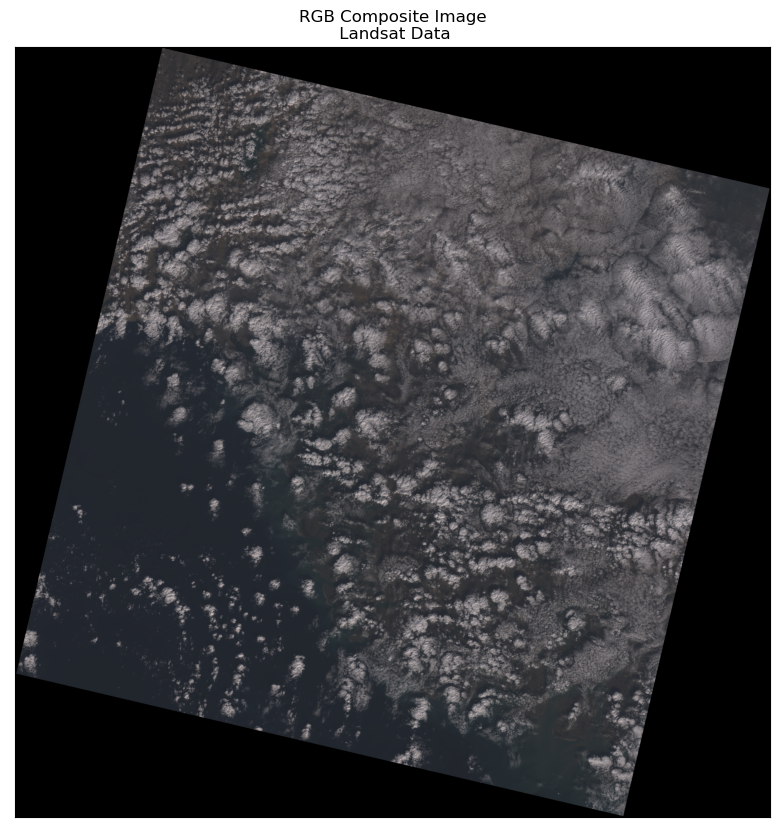

In [23]:
# plotting composite rgb image of the landsat data
ep.plot_rgb(images_array.values, rgb=[3, 2, 1], title="RGB Composite Image\n Landsat Data")
plt.show()

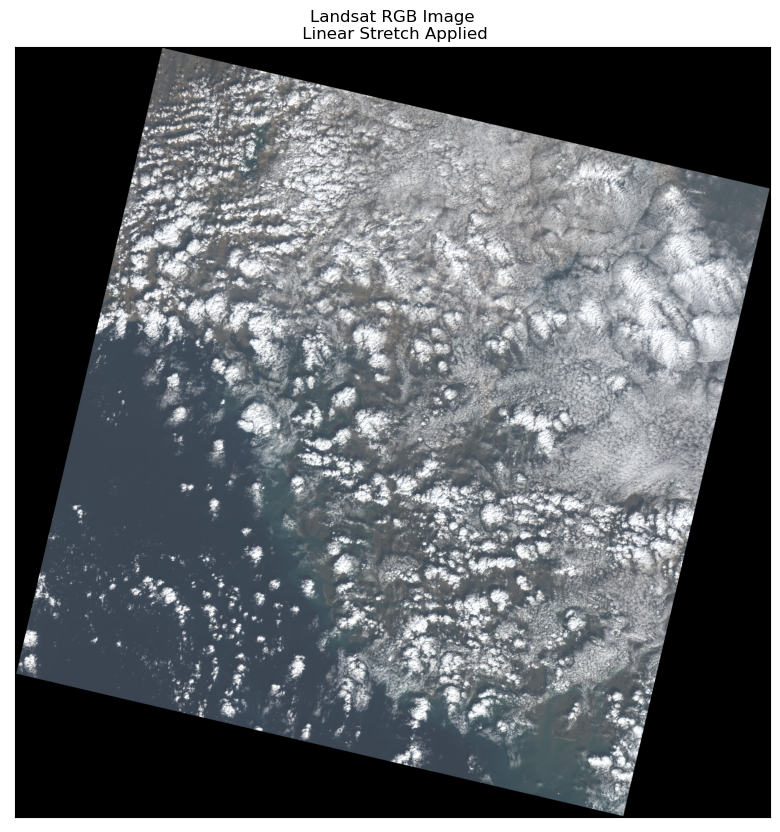

In [28]:
# stretching the pixel values from original to (0 to 255) 
ep.plot_rgb(images_array.values, rgb=[3, 2, 1], title="Landsat RGB Image\n Linear Stretch Applied", 
            stretch=True,
            str_clip=2)
plt.show()

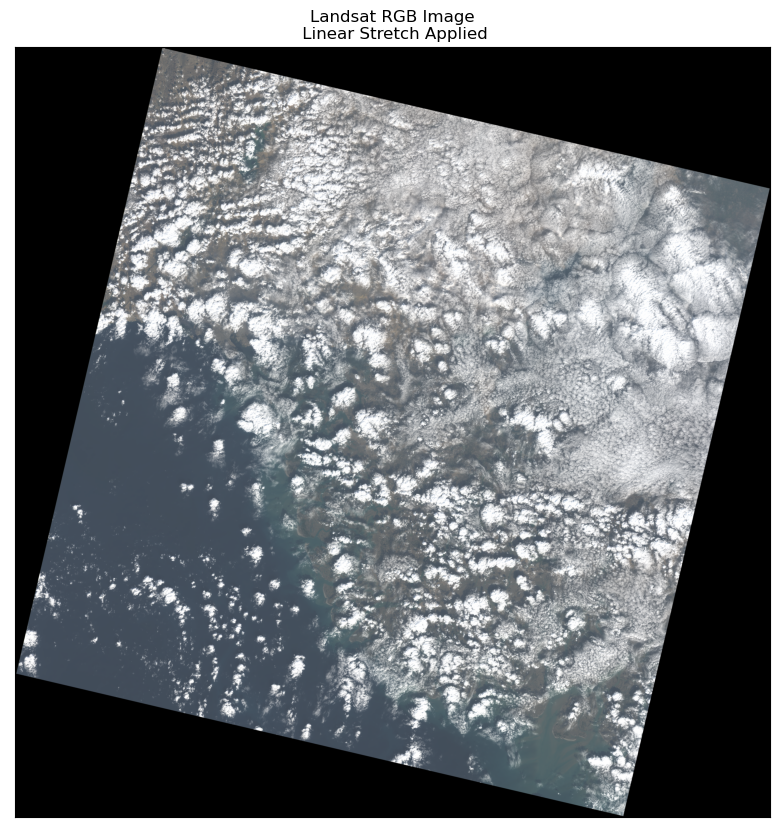

In [29]:
# Adjusting the amount of linear stretch to futher brighten the image
ep.plot_rgb(images_array.values, rgb=[3, 2, 1], title="Landsat RGB Image\n Linear Stretch Applied", 
            stretch=True,
            str_clip=4)
plt.show()